# Day 7

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math

In [2]:
africaDF = pd.read_csv('sample_data/african_crises.csv') 
africaDF = africaDF.loc[africaDF['country'] == 'Algeria',:]
africaDF

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1,DZA,Algeria,2010,0,74.943700,0,0,0.0,3.913000,1,0,0,no_crisis
81,1,DZA,Algeria,2011,0,76.056300,0,0,0.0,4.522000,1,0,0,no_crisis
82,1,DZA,Algeria,2012,0,78.102500,0,0,0.0,8.916000,1,0,0,no_crisis
83,1,DZA,Algeria,2013,0,78.148701,0,0,0.0,3.255000,1,0,0,no_crisis


# FWL Theorem

So we might be interested in multiple regression:

In [3]:
modelFull = smf.ols('exch_usd ~ year + inflation_annual_cpi', data = africaDF).fit()
print(modelFull.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     36.21
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           5.38e-12
Time:                        23:23:38   Log-Likelihood:                -380.63
No. Observations:                  85   AIC:                             767.3
Df Residuals:                      82   BIC:                             774.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -868.6472 

One might be tempted to look at a single regression and find a similarity.

In [4]:
modelYear = smf.ols('exch_usd ~ year', data = africaDF).fit()
print(modelYear.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     60.24
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.94e-11
Time:                        23:23:38   Log-Likelihood:                -384.34
No. Observations:                  85   AIC:                             772.7
Df Residuals:                      83   BIC:                             777.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -834.4024    110.131     -7.576      0.0

Still nothing!!!  But what if we subtracted out the estimates of one of the variables?

In [13]:
modelIndependentVars = smf.ols('inflation_annual_cpi ~ year', data = africaDF).fit()
africaDF['inflResid'] = modelIndependentVars.resid  #just gets residuals already, smf calculates immediately and stores.
africaDF['exchResid'] = modelYear.resid #just gets residuals already, smf calculates immediately and stores.

demoFWL = smf.ols('exchResid ~ inflResid', data = africaDF).fit()
print(demoFWL.params)
print(modelFull.params)

Intercept   -2.962146e-13
inflResid   -4.545843e-01
dtype: float64
Intercept              -868.647240
year                      0.455832
inflation_annual_cpi     -0.454584
dtype: float64


Do you seem the identical term?

Goal - get $\hat{\beta}_2$ from:

$y = \beta_0 +\beta_1 x_1 + \beta_2 x_2 + \epsilon$
 
Can be reached by first making two single regressions:

$y = \hat{\gamma}_0' +\hat{\gamma}_1' x_1$

$x_2 = \hat{\delta}_0' +\hat{\delta}_1' x_1$

Then getting the residuals for your inputs and outputs:

$ \tilde{y} = y - (\hat{\gamma}_0' +\hat{\gamma}_1' x_1)$

$ \tilde{x_2} = x_2 - (\hat{\delta}_0' +\hat{\delta}_1' x_1)$

Then estimate this last single regression:

$ \tilde{y} = \beta_0' + \beta_2' \tilde{x_2} + \epsilon$

Amazingly:

$\hat{\beta}_2' = \hat{\beta}_2$

# Categorical Variables

Consists of variables where numeric value each represents distinct qualities.  
Examples:
*    M & F 
*    debt crisis & no debt crises 
*    red car & green car & blue car...


In [6]:
africaDF

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,inflResid,exchResid
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis,-2.573643,19.027515
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis,8.090540,18.591992
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis,-9.820694,18.155410
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis,5.058295,17.718759
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis,-10.037664,17.282330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1,DZA,Algeria,2010,0,74.943700,0,0,0.0,3.913000,1,0,0,no_crisis,-8.192271,32.870929
81,1,DZA,Algeria,2011,0,76.056300,0,0,0.0,4.522000,1,0,0,no_crisis,-7.626773,33.547472
82,1,DZA,Algeria,2012,0,78.102500,0,0,0.0,8.916000,1,0,0,no_crisis,-3.276274,35.157614
83,1,DZA,Algeria,2013,0,78.148701,0,0,0.0,3.255000,1,0,0,no_crisis,-8.980775,34.767758


In [7]:
#Everything works fine:
modelCat1 = smf.ols('exch_usd ~ year + systemic_crisis', data = africaDF).fit()
print(modelCat1.summary())


                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     30.06
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.62e-10
Time:                        23:23:39   Log-Likelihood:                -384.16
No. Observations:                  85   AIC:                             774.3
Df Residuals:                      82   BIC:                             781.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -834.4014    110.567     

In [8]:
predValues = modelCat1.predict(africaDF) #predict for every element in africa DF

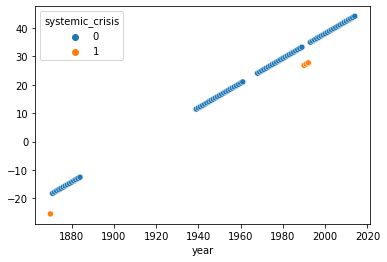

In [10]:
scatterWithCategoricals = sns.scatterplot(x=africaDF['year'], y = predValues, hue = africaDF['systemic_crisis'])

In [11]:
#Invert a known variable.  What does this mean?
africaDF['noSystemicCrisis'] = 1-africaDF['systemic_crisis']

In [12]:
#Warning is added - serious warning!:
modelCat2 = smf.ols('exch_usd ~ year + systemic_crisis + noSystemicCrisis', data = africaDF).fit()
print(modelCat2.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     30.06
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.62e-10
Time:                        23:43:18   Log-Likelihood:                -384.16
No. Observations:                  85   AIC:                             774.3
Df Residuals:                      82   BIC:                             781.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -558.5388     73.812  

# F-test

Next Up